In [1]:
# we are importing libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

# random state is set so that it will give same random values whenever it is run
torch.manual_seed(42)
np.random.seed(42)

#Cuda is a software developed by Nvidia to use GPU
# why Nvidia GPU ? Pytorch used Cuda which can work only on Nvidia GPU
#gives pytorch version
print(f"✅ PyTorch version: {torch.__version__}")

# checks if Nvidia GPU is available in the laptop
print(f"✅ GPU available: {torch.cuda.is_available()}")

# if present, get the GPU model details
if torch.cuda.is_available():
    print(f"   Device: {torch.cuda.get_device_name(0)}")

print("\n🎉 You're all set! Let's dive in!")

✅ PyTorch version: 2.9.0+cpu
✅ GPU available: False

🎉 You're all set! Let's dive in!





Why Tensors Matter

Neural network cannot understand image, video, text or sound. it can understand only numbers. So all data must be converted into numerical form called tensors.

A number (like temperature): scalar (0D)
A list (like daily temperatures): vector (1D)
A spreadsheet (like temperature across cities): matrix (2D)
A video (frames × height × width × color): 4D tensor


Why Tensor why not numpy ?


*   Tensor uses GPU , so faster computation || Tensor can use both cpu and gpu , Numpy can work only on CPU
*   Compute gradient automaticalltical - which is used to learn weights for the model


*   Every part of a neural network takes tensors as input and produces tensors as output






**Scalar**

Scalar as a single measurement: temperature, price, score, etc.

In [2]:
# create scalar tensor
favorite_number = torch.tensor(7.0)

# shape tells the size along each axis
# dimension tells how many axes the tensor has
print(f"Value: {favorite_number}")
print(f"Shape: {favorite_number.shape}")
print(f"Dimensions: {favorite_number.dim()}")
print(f"Data type: {favorite_number.dtype}")

Value: 7.0
Shape: torch.Size([])
Dimensions: 0
Data type: torch.float32


**Vector**

Vectors - Sequences of Numbers

In [3]:
# create 1D tensor (vector)
my_day = torch.tensor([7.0, 5.0, 1.0, 3.0, 8.0])

# Item() converts a 1-value tensor → normal Python number
# item convert scalar tensor to python number as python print required number to be in python not tensor
print(f"My day: {my_day}")
print(f"Shape: {my_day.shape}")
print(f"Total hours: {my_day.sum().item()}")
print(f"Dimension: {my_day.dim()}")

# find average of 1D tensor
average_time = my_day.mean()
print(f"Average time per activity: {average_time}")

My day: tensor([7., 5., 1., 3., 8.])
Shape: torch.Size([5])
Total hours: 24.0
Dimension: 1
Average time per activity: 4.800000190734863


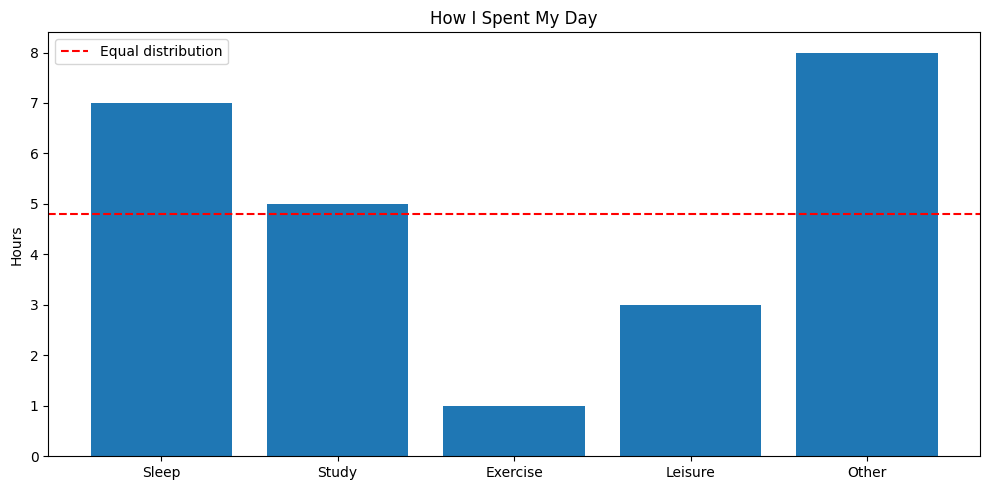

In [4]:

# 📊 Let's visualize your day!
activities = ['Sleep', 'Study', 'Exercise', 'Leisure', 'Other']

# Adjust the labels so they match the number of elements in the tensor
activities = activities[:len(my_day)]
plt.figure(figsize=(10, 5))

# Convert tensor to numpy array because matplotlib cannot plot tensors directly
plt.bar(activities, my_day.numpy())
plt.ylabel('Hours')
plt.title('How I Spent My Day')

# Draw a red horizontal line showing equal time distribution (average hours per activity)
plt.axhline(y=24/len(my_day), color='r', linestyle='--', label='Equal distribution')
plt.legend()
plt.tight_layout()
plt.show()

**Matrix**

Matrices - Tables of Data

In [5]:
# Create matrix: rows = students, columns = assignments
# Random values between 60 and 100 in a 4x5 matrix
grades = torch.randint(60, 101, (4, 5)).float()

print("Grade Matrix:")
print(grades)
print(f"\nShape: {grades.shape}")

# Calculate each student's average
# dim=1 → average across columns (each row → one value per student)
student_averages = grades.mean(dim=1)

# Calculate each assignment's average grade
# dim=0 → average across rows (each column → one value per assignment)
assignment_averages = grades.mean(dim=0)

print(f"\nStudent averages: {student_averages}")
print(f"Assignment averages: {assignment_averages}")

Grade Matrix:
tensor([[ 60.,  68.,  94.,  68.,  82.],
        [ 71.,  71.,  87.,  71.,  69.],
        [ 65.,  92.,  64., 100.,  69.],
        [ 87.,  72., 100.,  72.,  69.]])

Shape: torch.Size([4, 5])

Student averages: tensor([74.4000, 73.8000, 78.0000, 80.0000])
Assignment averages: tensor([70.7500, 75.7500, 86.2500, 77.7500, 72.2500])


In [6]:

# Let's create a simple 3×4 matrix
matrix = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
], dtype=torch.float32)

print("Original matrix:")
print(matrix)
print(f"Shape: {matrix.shape}\n")

# dim → reduces axis
 # keepdim=True → keeps axis but size becomes 1
print("Mean along dim=0 (average down rows → one value per column):")
print(matrix.mean(dim=0))
print(f"Shape: {matrix.mean(dim=0).shape}\n")

print("Mean along dim=1 (average across columns → one value per row):")
print(matrix.mean(dim=1))
print(f"Shape: {matrix.mean(dim=1).shape}")

Original matrix:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])

Mean along dim=0 (average down rows → one value per column):
tensor([5., 6., 7., 8.])
Shape: torch.Size([4])

Mean along dim=1 (average across columns → one value per row):
tensor([ 2.5000,  6.5000, 10.5000])
Shape: torch.Size([3])


**Higher-Dimensional Tensors - The Real World**

In deep learning, you'll often work with 4D tensors, especially for images:

**Shape: (Batch, Channels, Height, Width)**

For example, 32 RGB images of size 224×224:

* Batch: 32 (number of images)
* Channels: 3 (Red, Green, Blue)
* Height: 224 pixels
* Width: 224 pixels

In [7]:
# NOTE THIS FIRST HEIGHT , THEN WE WILL HAVE WIDTH **Shape: (Batch, Channels, Height, Width)**
# Create 4D tensor with zero as value with shape (8, 1, 28, 28)
# This represents 8 grayscale MNIST-like images
image_batch = torch.zeros(8, 1, 28, 28)

print(f"Batch shape: {image_batch.shape}")
print(f"Number of images: {image_batch.shape[0]}")
print(f"Channels per image: {image_batch.shape[1]}")
print(f"Image dimensions: {image_batch.shape[2]} × {image_batch.shape[3]}")

# numel() returns total number of elements in the tensor
# For image tensors, elements correspond to pixel values
total_pixels = image_batch.numel()
print(f"\nTotal pixels in batch: {total_pixels}")

Batch shape: torch.Size([8, 1, 28, 28])
Number of images: 8
Channels per image: 1
Image dimensions: 28 × 28

Total pixels in batch: 6272


# Tensor Operations

In [8]:

# take two 1 D tensor and do some operation on it
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print("Vector a:", a)
print("Vector b:", b)
print("\nOperations:")
# element wise addition
print(f"Addition (a + b): {a + b}")
# element-wise multiplication
print(f"Element-wise multiplication (a * b): {a * b}")
print(f"Dot product (a @ b): {a @ b}")
print(f"Sum of a: {a.sum()}")
print(f"Mean of a: {a.mean()}")
print(f"Max of a: {a.max()}")

Vector a: tensor([1., 2., 3.])
Vector b: tensor([4., 5., 6.])

Operations:
Addition (a + b): tensor([5., 7., 9.])
Element-wise multiplication (a * b): tensor([ 4., 10., 18.])
Dot product (a @ b): 32.0
Sum of a: 6.0
Mean of a: 2.0
Max of a: 3.0


# Matrix Multiplication

In [9]:
# Create weight matrix (3 neurons, each having 4 weights)
W = torch.randn(3, 4)

# Create input feature vector (4 input features for one sample)
x = torch.randn(4, 1)

print("Weight matrix W shape:", W.shape)
print("Input vector x shape:", x.shape)

# Perform matrix multiplication
output = W @ x

print(f"\nOutput shape: {output.shape}")



Weight matrix W shape: torch.Size([3, 4])
Input vector x shape: torch.Size([4, 1])

Output shape: torch.Size([3, 1])


# Reshaping: Changing Perspectives
Neural networks often need to reshape data.

In [10]:
# Create a simple image: 1×28×28 (1 channel, 28×28 pixels)
image = torch.randn(1, 28, 28)
print(f"Original image shape: {image.shape}")
print(f"Total elements: {image.numel()}")

# Flatten to a vector - rearranging all the pixel as vector
flattened = image.view(-1)  # -1 means collapse all axes
print(f"\nFlattened shape: {flattened.shape}")

# Alternative flattening
flattened2 = image.reshape(1, -1)  # keep first axis, flatten remaining
print(f"Flattened (keep batch) shape: {flattened2.shape}")

# Reconstruct
reconstructed = flattened.view(1, 28, 28)
print(f"\nReconstructed shape: {reconstructed.shape}")
print(f"Same as original? {torch.equal(image, reconstructed)}")

Original image shape: torch.Size([1, 28, 28])
Total elements: 784

Flattened shape: torch.Size([784])
Flattened (keep batch) shape: torch.Size([1, 784])

Reconstructed shape: torch.Size([1, 28, 28])
Same as original? True


In [11]:
# You have a batch of 32 RGB images, each 64×64 pixels
# Shape: (32, 3, 64, 64)

batch = torch.randn(32, 3, 64, 64)
print(f"Original batch shape: {batch.shape}")

# Flatten each image while keeping the batch dimension
flattened_batch = batch.view(32, -1)

print(f"Flattened batch shape: {flattened_batch.shape}")

# 🔵 Verify: Does the number of elements match?
print(f"\nOriginal elements: {batch.numel()}")
print(f"Flattened elements: {flattened_batch.numel()}")
print(f"Match? {batch.numel() == flattened_batch.numel()}")

Original batch shape: torch.Size([32, 3, 64, 64])
Flattened batch shape: torch.Size([32, 12288])

Original elements: 393216
Flattened elements: 393216
Match? True


# Autograd - The Magic of Automatic Differentiation

Autograd automatically calculates gradients (derivatives)

### 🧪 Experiment 1: Simple Gradient

Let's start with a simple function: $f(x) = x^2$

We know the derivative is: $\frac{df}{dx} = 2x$

Let's see PyTorch compute it automatically!

In [12]:
# Create a tensor and tell PyTorch to track operations on it
# PyTorch will record all operations involving x to compute gradients later
x = torch.tensor(3.0, requires_grad=True)
print(f"x = {x}")
print(f"Tracking gradients? {x.requires_grad}")

# Define function: f(x) = x^2
y = x ** 2
print(f"\ny = x^2 = {y}")

# Compute gradient — find how sensitive y is with respect to x (dy/dx)
# This computes dy/dx and stores it in x.grad
# If x changes a tiny bit, y will change about 6 times that amount
y.backward()


# Instead of checking exact equality (floating point may have tiny errors),
# we check if the difference is very small (tolerance)
print(f"\nGradient dy/dx = {x.grad}")
print(f"Expected (2*x) = {2 * x.item()}")
print(f"Match? {abs(x.grad.item() - 2*x.item()) < 1e-6}")

x = 3.0
Tracking gradients? True

y = x^2 = 9.0

Gradient dy/dx = 6.0
Expected (2*x) = 6.0
Match? True


### 🧪 Experiment 2: More Complex Function

Now let's try: $f(x) = 3x^2 + 2x + 1$

Derivative: $\frac{df}{dx} = 6x + 2$

In [13]:
# Create scalar tensor and track operations on this tensor for gradient computation
x = torch.tensor(2.0, requires_grad=True)

# Define the function
y = 3*x**2 + 2*x + 1

# Compute gradient — measure how sensitive y is with respect to x (dy/dx)
y.backward()

print(f"x = {x.item()}")
print(f"y = {y.item()}")
print(f"\nGradient dy/dx = {x.grad.item()}")
print(f"Expected (6*x + 2) = {6*x.item() + 2}")

x = 2.0
y = 17.0

Gradient dy/dx = 14.0
Expected (6*x + 2) = 14.0


### 🎯 Discovering Gradient Descent

Now comes the magic: **using gradients to optimize**!

Imagine you want to find the minimum of $f(x) = (x - 3)^2$

We know the minimum is at $x = 3$, but let's let gradient descent discover it!

* **PyTorch tracks operations to apply chain rule and compute gradient.**
*  **The gradient tells direction and steepness of error.**
* **Using it in the update rule, we move x step-by-step toward the minimum.**

In [14]:
# we are taking some randome value as 10 which is far from 3 and we know that is the answer

x = torch.tensor(10.0, requires_grad=True)
learning_rate = 0.1
num_steps = 50

# Track the journey
x_history = []
y_history = []

for step in range(num_steps):
    # Compute function value
    y = (x - 3) ** 2

    # Store for visualization
    x_history.append(x.item())
    y_history.append(y.item())

    # Compute gradient
    y.backward()

    # Update x using gradient descent: x = x - learning_rate * gradient
    with torch.no_grad():  # Don't track this operation
        x -= learning_rate * x.grad

    # Clear gradient for next iteration
    x.grad.zero_()

    if step % 10 == 0:
        print(f"Step {step}: x = {x.item():.4f}, y = {y.item():.4f}")

print(f"\nFinal x = {x.item():.4f} (target: 3.0)")

Step 0: x = 8.6000, y = 49.0000
Step 10: x = 3.6013, y = 0.5649
Step 20: x = 3.0646, y = 0.0065
Step 30: x = 3.0069, y = 0.0001
Step 40: x = 3.0007, y = 0.0000

Final x = 3.0001 (target: 3.0)


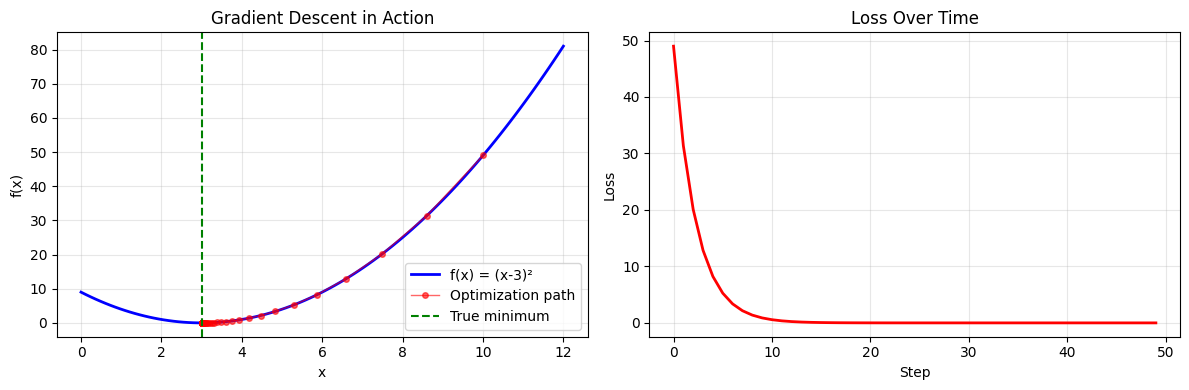

In [15]:
# 📊 Visualize the optimization journey
if len(x_history) > 0:
    plt.figure(figsize=(12, 4))

    # Plot 1: Function and optimization path
    plt.subplot(1, 2, 1)
    x_range = np.linspace(0, 12, 100)
    y_range = (x_range - 3) ** 2
    plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = (x-3)²')
    plt.plot(x_history, y_history, 'ro-', markersize=4, linewidth=1, alpha=0.6, label='Optimization path')
    plt.axvline(x=3, color='g', linestyle='--', label='True minimum')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent in Action')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Convergence
    plt.subplot(1, 2, 2)
    plt.plot(y_history, 'r-', linewidth=2)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Loss Over Time')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Part 3: Building  First Neural Network


To build a neural network that can recognize handwritten digits (0-9).
This is the "Hello World" of deep learning, but it's a real accomplishment!

* The Dataset: MNIST
* Training samples: 60,000 handwritten digits
* Test samples: 10,000 handwritten digits
* Image size: 28×28 pixels (grayscale)
* Classes: 10 (digits 0-9)

In [16]:
# Convert image to tensor, now pixel values from 0-255 will be changed to 0-1
# compute mean and standard deviation of all the iamge
# use mean and standard deviation to normalize the value so that now mean becomes 0
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize (mean, std of MNIST)
])

# Download and load training data
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Download and load test data
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

print(f"✅ Training samples: {len(train_dataset)}")
print(f"✅ Test samples: {len(test_dataset)}")

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.02MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]

✅ Training samples: 60000
✅ Test samples: 10000


# Exploring the Data

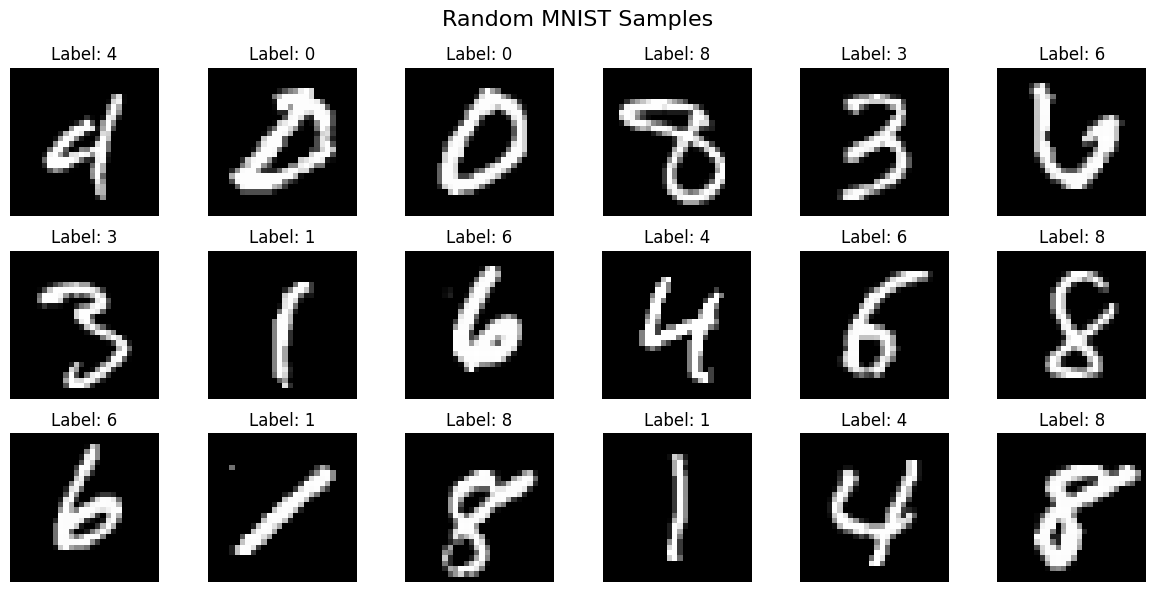


Image shape: torch.Size([1, 28, 28])
Label: 5
Pixel value range: [-0.42, 2.82]


In [17]:
#  Creating space to display 18 images
fig, axes = plt.subplots(3, 6, figsize=(12, 6))
axes = axes.flatten()

for i in range(18):
    # Get one random traning sample and take the image and its label
    idx = np.random.randint(len(train_dataset))
    image, label = train_dataset[idx]

    # Convert from tensor to numpy for plotting
    # squeeze() removes any dimension whose size = 1 so that i can be displayed by matplotlib
    image = image.squeeze().numpy()

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.suptitle('Random MNIST Samples', fontsize=16)
plt.tight_layout()
plt.show()

# Get a single image to inspect
sample_image, sample_label = train_dataset[0]
print(f"\nImage shape: {sample_image.shape}")
print(f"Label: {sample_label}")
print(f"Pixel value range: [{sample_image.min():.2f}, {sample_image.max():.2f}]")

# Dataset Analysis

* we are checking How many images of digit 0, 1, 2, 3, … 9 exist in the training dataset

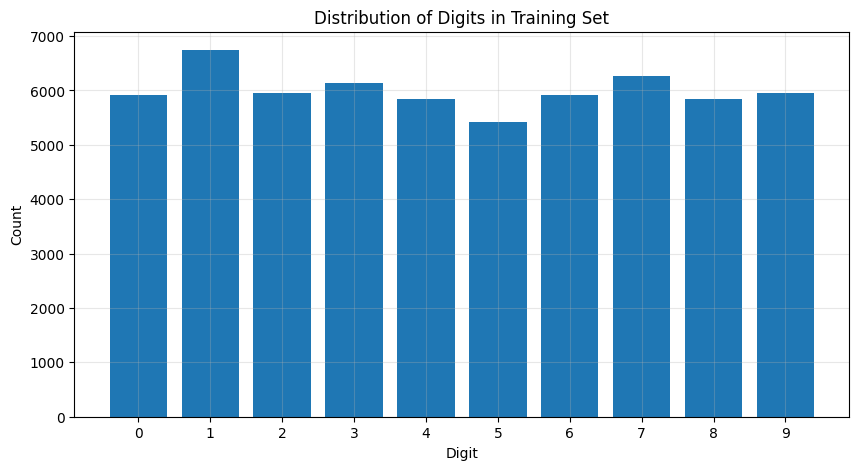

Count per digit:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [18]:
# Create 1D tensor with 0 values in it
digit_counts = torch.zeros(10)

# We use _ because the dataset returns both image and label, but we only care about the label, so we ignore the image
for _, label in train_dataset:
    digit_counts[label] += 1

# 📊 Visualize the distribution
plt.figure(figsize=(10, 5))
plt.bar(range(10), digit_counts.numpy())
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in Training Set')
plt.xticks(range(10))
plt.grid(True, alpha=0.3)
plt.show()

print("Count per digit:")
for digit in range(10):
    print(f"Digit {digit}: {int(digit_counts[digit])} samples")

#  Creating Data Loaders

* load the data little by little rather than giving all at once.
* if we give all 60,000 images at once, GPU will crash



In [19]:
# we are taking a batch size of 64
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # Shuffle training data
    num_workers=2  # Data will be loaded for the next batch so that GPU did not want to wait
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # Don't shuffle test data
    num_workers=2
)

print(f"✅ Training batches: {len(train_loader)}")
print(f"✅ Test batches: {len(test_loader)}")

# this will give the details on the first batch of the training dataset
images, labels = next(iter(train_loader))
print(f"\nBatch of images shape: {images.shape}")
print(f"Batch of labels shape: {labels.shape}")
print(f"First 10 labels in batch: {labels[:10]}")

✅ Training batches: 938
✅ Test batches: 157

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])
First 10 labels in batch: tensor([5, 9, 7, 4, 0, 4, 0, 8, 2, 8])


 # Building Your Neural Network


### Architecture Overview

```
Input (28×28 image)
    ↓
Flatten to vector (784 values)
    ↓
Hidden Layer 1 (128 neurons) + ReLU
    ↓
Hidden Layer 2 (64 neurons) + ReLU
    ↓
Output Layer (10 neurons, one per digit)
```

* Parameters → the weights and biases of the neural network (the values the model can learn)

* Total parameters → total number of weights and biases present in the entire network

* Trainable parameters → the subset of parameters that are allowed to update during training (requires_grad=True)

During transfer learning:

* pretrained layers are frozen → their values do NOT change

* new layers learn → only these are trainable parameters

In [20]:
# nn.Module → PyTorch provides a base class for building neural networks.
# We customize it by defining our own architecture (layers + data flow).

# Every PyTorch neural network mainly has two important parts:

# 1. __init__ → defines the layers (how many neurons/features each layer outputs)
#    It builds the structure of the network (no computation happens here)

# 2. forward → defines how input data moves through those layers
#    Actual computation and prediction logic happens here
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # Input: 28×28 = 784 pixels
        # Output: 10 classes (digits 0-9)

        # Layer 1: 784 → 128
        self.fc1 = nn.Linear(784, 128)

        # Layer 2: 128 → 64
        self.fc2 = nn.Linear(128, 64)

        # Layer 3: 64 → 10
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x shape: (batch_size, 1, 28, 28)

        # Flatten the image
        x = x.view(x.size(0), -1)

        # Layer 1 with ReLU activation
        x = F.relu(self.fc1(x))

        # Layer 2 with ReLU activation
        x = F.relu(self.fc2(x))

        # Layer 3 (no activation - CrossEntropyLoss handles softmax)
        x = self.fc3(x)

        return x

# Create the model
model = MNISTClassifier()
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)


# here both are same as we don't have any frozen parameters
print(f"\n📊 Total parameters: {total_params:,}")
print(f"📊 Trainable parameters: {trainable_params:,}")

MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

📊 Total parameters: 109,386
📊 Trainable parameters: 109,386


#  Test  Model Architecture

In [21]:
# Test if the model works with a dummy batch of images
 # Create 5 fake images with MNIST shape
dummy_input = torch.randn(5, 1, 28, 28)
print(f"Input shape: {dummy_input.shape}")

try:
  # gives what is the input and output neuron count
    output = model(dummy_input)
    print(f"Output shape: {output.shape}")
    print(f"✅ Model architecture is correct!")

    # Show raw scores (logits) from the final layer for the first image
    # These are NOT probabilities yet
    print(f"\nRaw outputs (before training):")
    print(output[0])  # First sample

      # Convert raw scores to probabilities using softmax
    # This gives probability distribution across digits 0–9 for the first image
    probabilities = F.softmax(output[0], dim=0)
    print(f"\nProbabilities for each digit (before training):")
    for digit in range(10):
        print(f"Digit {digit}: {probabilities[digit]:.2%}")


# If any shape or computation error occurs, catch and display it
except Exception as e:
    print(f"❌ Error: {e}")
    print("Check your forward() method!")

Input shape: torch.Size([5, 1, 28, 28])
Output shape: torch.Size([5, 10])
✅ Model architecture is correct!

Raw outputs (before training):
tensor([ 0.0755,  0.2844, -0.0940,  0.1527, -0.1873, -0.0145,  0.2382, -0.0992,
         0.1192, -0.0694], grad_fn=<SelectBackward0>)

Probabilities for each digit (before training):
Digit 0: 10.24%
Digit 1: 12.62%
Digit 2: 8.64%
Digit 3: 11.06%
Digit 4: 7.87%
Digit 5: 9.36%
Digit 6: 12.05%
Digit 7: 8.60%
Digit 8: 10.70%
Digit 9: 8.86%


# Setting up Training

* Loss function here we are using cross entropy that tells how much prediction is wrong
* optimizer updates weights to reduce loss, which gradually leads to correct predictions, we have adam, SGD

In [23]:
# we are suing cross entropy as loss function
criterion = nn.CrossEntropyLoss()

# we can try with two optimizer SGD or Adam
# Option 1: SGD with momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Option 2: Adam (often works better)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("✅ Loss function: CrossEntropyLoss")
print(f"✅ Optimizer: {optimizer.__class__.__name__}")
print(f"✅ Learning rate: {optimizer.param_groups[0]['lr']}")

✅ Loss function: CrossEntropyLoss
✅ Optimizer: SGD
✅ Learning rate: 0.01


# Training Loop: Where the Magic Happens
The training loop follows this pattern:

For each epoch:

    For each batch:
        1. Forward pass (make predictions)
        2. Calculate loss (how wrong are we?)
        3. Backward pass (compute gradients)
        4. Update weights (take a step)
        5. Zero gradients (prepare for next batch)



* Batch : How many images the DataLoader gives the model at one time
* Epoch : One full pass through the entire dataset

In [24]:

def train_one_epoch(model, train_loader, criterion, optimizer, device='cpu'):
    """
    Train the model for one epoch

    Returns:
        average_loss: Average loss over all batches
        accuracy: Training accuracy
    """
    # model is set in training mode
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        # DataLoader reads data from disk into RAM, and .to(device) transfers that batch from RAM to the (CPU or GPU) so the model can compute on it.
        images, labels = images.to(device), labels.to(device)

        # Step 1 - Forward pass
        outputs = model(images)

        # Step 2 - Calculate loss
        loss = criterion(outputs, labels)

        # Step 3 - Zero the gradients (BEFORE backward!)
        optimizer.zero_grad()

        # Step 4 - Backward pass
        loss.backward()

        # Step 5 - Update weights
        optimizer.step()

        # Track statistics
        # running_loss → accumulates batch losses (used to compute avg epoch loss)
        # predicted → predictions for the CURRENT batch only (size = batch_size)
        # total → how many images processed so far in this epoch
        # correct → how many predictions were correct so far in this epoch

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print progress every 100 batches
        if (batch_idx + 1) % 100 == 0:
            print(f'  Batch [{batch_idx + 1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}')

    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total

    return avg_loss, accuracy

print("✅ Training function defined!")

✅ Training function defined!


# Evaluation Function

In [25]:
def evaluate(model, test_loader, criterion, device='cpu'):
    """
    Evaluate the model on test data

    Returns:
        average_loss: Average loss over test set
        accuracy: Test accuracy
    """
    model.eval()  # Set model to evaluation mode

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Don't track gradients during evaluation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total

    return avg_loss, accuracy

print("✅ Evaluation function defined!")

✅ Evaluation function defined!


# Let's Train!


**Disk → RAM → GPU → computation**


Example during training:
* Dataset stored on disk
* DataLoader loads batch into RAM
* .to(device) moves batch to GPU
* Model computes

In [26]:
# The model will learn from the entire training dataset 5 times (5 epochs)


num_epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Moves model  from CPU memory (RAM) to GPU memory (VRAM) if CUDA is available


model = model.to(device)

print(f"Training on: {device}")
print(f"Number of epochs: {num_epochs}")
print("\nStarting training...\n")

# Track history
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(num_epochs):
    print(f"{'='*60}")
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"{'='*60}")

    # Train
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)

    # Evaluate
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)

    # Store history
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    # Print summary
    print(f"\nEpoch Summary:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Test Loss:  {test_loss:.4f} | Test Acc:  {test_acc:.2f}%")
    print()

print("\n" + "="*60)
print("🎉 Training Complete!")
print("="*60)
print(f"Final Test Accuracy: {test_accs[-1]:.2f}%")

Training on: cpu
Number of epochs: 5

Starting training...

Epoch 1/5
  Batch [100/938], Loss: 0.3080
  Batch [200/938], Loss: 0.3097
  Batch [300/938], Loss: 0.2039
  Batch [400/938], Loss: 0.2130
  Batch [500/938], Loss: 0.1907
  Batch [600/938], Loss: 0.1298
  Batch [700/938], Loss: 0.1831
  Batch [800/938], Loss: 0.1303
  Batch [900/938], Loss: 0.0316

Epoch Summary:
  Train Loss: 0.3197 | Train Acc: 90.16%
  Test Loss:  0.1354 | Test Acc:  95.68%

Epoch 2/5
  Batch [100/938], Loss: 0.0723
  Batch [200/938], Loss: 0.0727
  Batch [300/938], Loss: 0.1169
  Batch [400/938], Loss: 0.1895
  Batch [500/938], Loss: 0.0398
  Batch [600/938], Loss: 0.0948
  Batch [700/938], Loss: 0.2720
  Batch [800/938], Loss: 0.1098
  Batch [900/938], Loss: 0.1345

Epoch Summary:
  Train Loss: 0.1134 | Train Acc: 96.53%
  Test Loss:  0.0970 | Test Acc:  97.12%

Epoch 3/5
  Batch [100/938], Loss: 0.0543
  Batch [200/938], Loss: 0.0649
  Batch [300/938], Loss: 0.0916
  Batch [400/938], Loss: 0.0262
  Batch 

# Visualize Training Progress

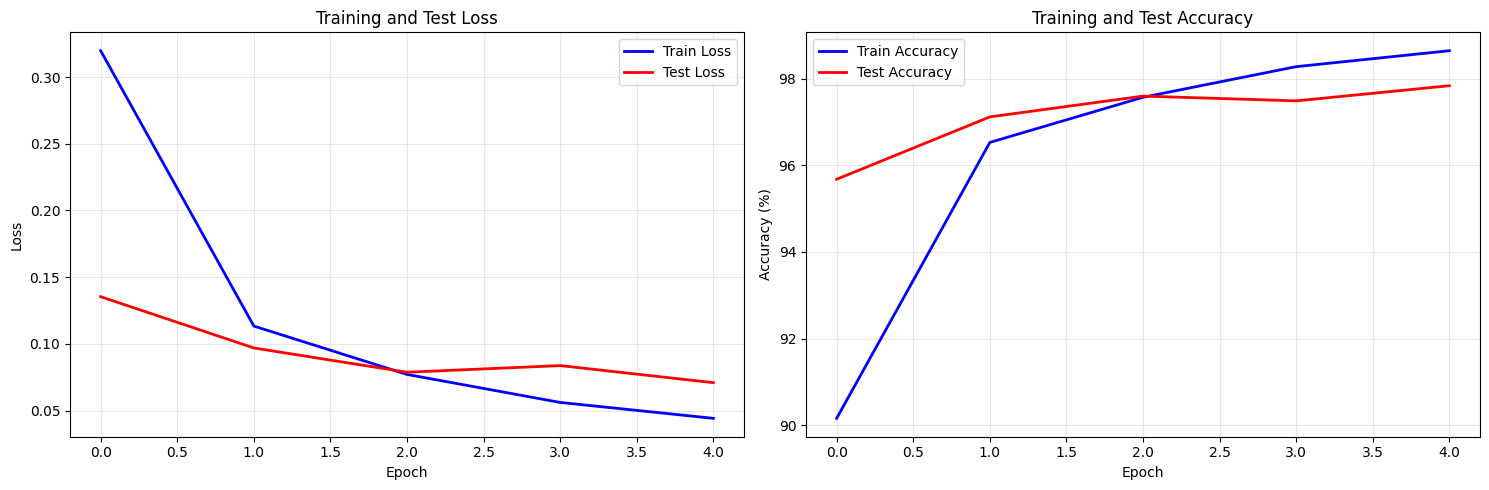

In [27]:
# Plot training curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
ax1.plot(train_losses, 'b-', label='Train Loss', linewidth=2)
ax1.plot(test_losses, 'r-', label='Test Loss', linewidth=2)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot(train_accs, 'b-', label='Train Accuracy', linewidth=2)
ax2.plot(test_accs, 'r-', label='Test Accuracy', linewidth=2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model in Action!

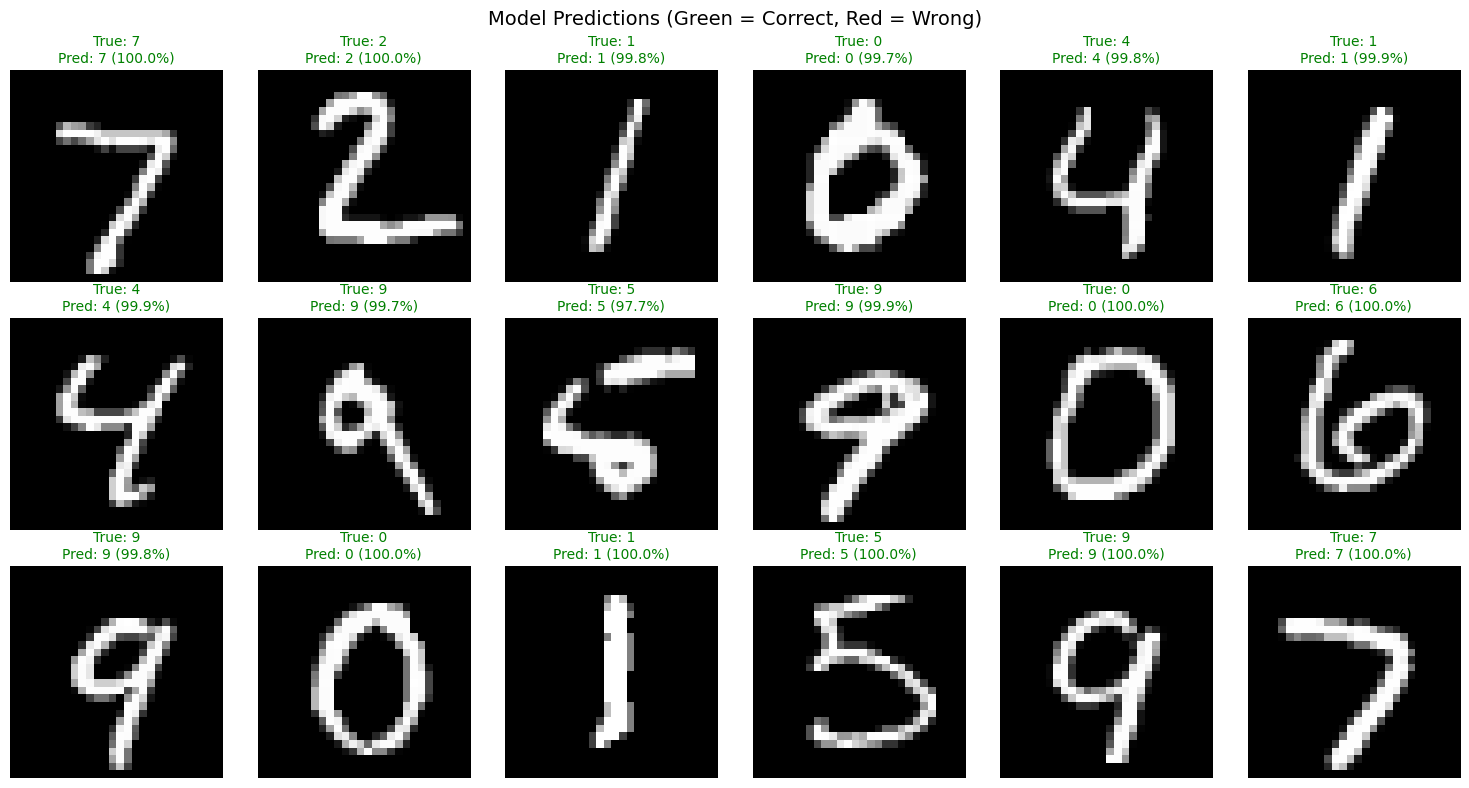

In [31]:
# Get a batch of test images
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)


# Run the model to get raw scores (logits)
# Convert them to probabilities for each class (0–9)
# Then select the predicted digit for each image (highest score)
with torch.no_grad():
    outputs = model(images)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted = torch.max(outputs, 1)


# Move tensors from GPU to CPU because matplotlib cannot display GPU tensors
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()
probabilities = probabilities.cpu()

# Visualize predictions
fig, axes = plt.subplots(3, 6, figsize=(15, 8))
axes = axes.flatten()

for i in range(18):
    img = images[i].squeeze().numpy()
    true_label = labels[i].item()
    pred_label = predicted[i].item()
    confidence = probabilities[i][pred_label].item()

    axes[i].imshow(img, cmap='gray')

    # Color: green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    axes[i].set_title(
        f'True: {true_label}\nPred: {pred_label} ({confidence:.1%})',
        color=color,
        fontsize=10
    )
    axes[i].axis('off')

plt.suptitle('Model Predictions (Green = Correct, Red = Wrong)', fontsize=14)
plt.tight_layout()
plt.show()

# Confusion matrix

* Diagonal cells → number of correct predictions for each class
We want these values high

* Off-diagonal cells → misclassifications (model confusion between classes)
We want these values low

The real digit was 4, but the model predicted 9, and this happened 12 times.

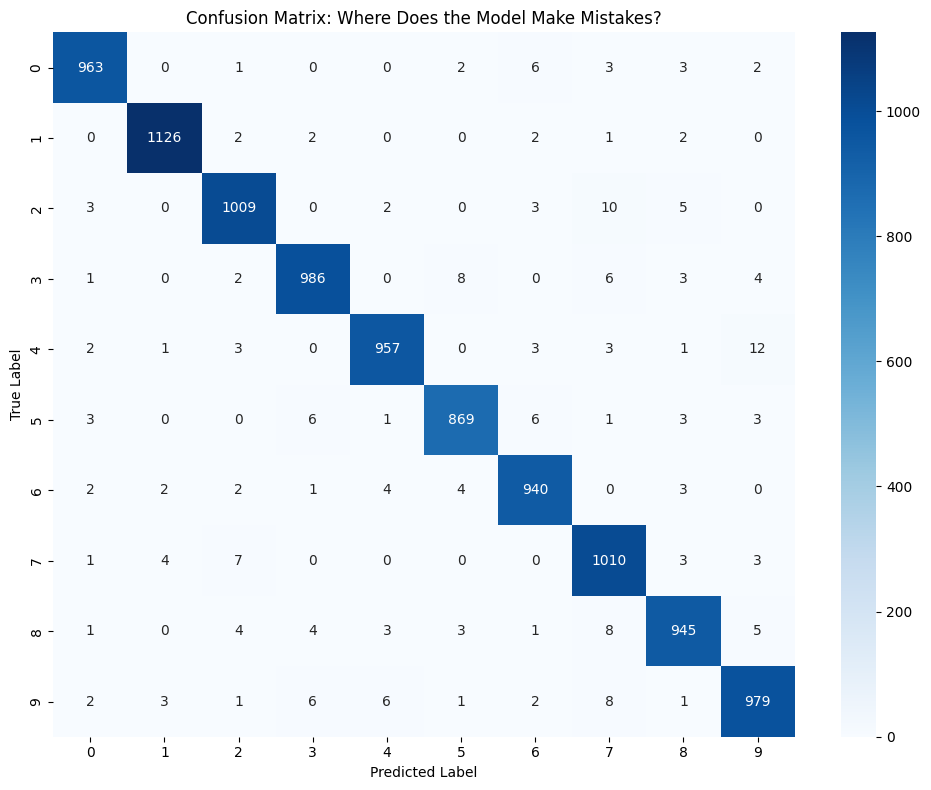


Most Common Confusions:


In [34]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get all predictions
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where Does the Model Make Mistakes?')
plt.tight_layout()
plt.show()

# Find most confused pairs, here we are giving threshold of 50
print("\nMost Common Confusions:")
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 50:  # Threshold for "common"
            print(f"  {i} misclassified as {j}: {cm[i, j]} times")

# Experiment with Architectures

In [35]:
class ImprovedClassifier(nn.Module):
  # Create linear layer, batchnorm and dropout in _init_ function
    def __init__(self):
        super(ImprovedClassifier, self).__init__()


        # BatchNorm1d normalizes the outputs coming from the previous layer.
        # Dropout randomly turns off some neurons during training so the model cannot memorize the training data → this helps prevent overfitting.
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        # we do the calculation and then do batch normalize and then apply relu function
        x = self.dropout1(F.relu(self.bn1(self.fc1(x))))
        x = self.dropout2(F.relu(self.bn2(self.fc2(x))))
        x = self.dropout3(F.relu(self.bn3(self.fc3(x))))
        # Final layer produces raw class scores
        x = self.fc4(x)
        return x

# Train and compare!
improved_model = ImprovedClassifier()
print(improved_model)
print(f"\nTotal parameters: {sum(p.numel() for p in improved_model.parameters()):,}")



ImprovedClassifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

Total parameters: 243,658


# Hyperparameter Tuning

Experiment with:

* Learning rates: [0.1, 0.01, 0.001, 0.0001]
* Batch sizes: [32, 64, 128, 256]
* Optimizers: SGD, Adam, RMSprop
* Number of epochs

In [36]:

# Create a table to track results
results = []

# Experiment over learning rates and batch sizes
for lr in [0.01, 0.001, 0.0001]:
    for batch_size in [32, 64, 128]:
        print(f"\nTrying: lr={lr}, batch_size={batch_size}")

        # Create fresh model for each experiment
        exp_model = MNISTClassifier().to(device)
        exp_optimizer = torch.optim.Adam(exp_model.parameters(), lr=lr)
        exp_criterion = nn.CrossEntropyLoss()

        exp_train_loader = DataLoader(train_dataset, batch_size=batch_size,
                                       shuffle=True, num_workers=2)
        exp_test_loader = DataLoader(test_dataset, batch_size=batch_size,
                                      shuffle=False, num_workers=2)

        # Train for 3 epochs (quick search)
        for epoch in range(3):
            train_loss, train_acc = train_one_epoch(
                exp_model, exp_train_loader, exp_criterion, exp_optimizer, device)

        test_loss, test_acc = evaluate(exp_model, exp_test_loader, exp_criterion, device)

        results.append({'lr': lr, 'batch_size': batch_size,
                        'test_acc': test_acc, 'test_loss': test_loss})
        print(f"  → Test Accuracy: {test_acc:.2f}%")

# Visualize results
print("\n" + "="*50)
print("Hyperparameter Search Results (sorted by accuracy):")
print("="*50)
for r in sorted(results, key=lambda x: -x['test_acc']):
    print(f"  lr={r['lr']}, bs={r['batch_size']} → {r['test_acc']:.2f}%")


Trying: lr=0.01, batch_size=32
  Batch [100/1875], Loss: 0.3258
  Batch [200/1875], Loss: 0.3085
  Batch [300/1875], Loss: 0.1734
  Batch [400/1875], Loss: 0.1570
  Batch [500/1875], Loss: 0.4079
  Batch [600/1875], Loss: 0.3206
  Batch [700/1875], Loss: 0.1286
  Batch [800/1875], Loss: 0.4206
  Batch [900/1875], Loss: 0.4136
  Batch [1000/1875], Loss: 0.0438
  Batch [1100/1875], Loss: 0.6878
  Batch [1200/1875], Loss: 0.1624
  Batch [1300/1875], Loss: 0.1118
  Batch [1400/1875], Loss: 0.3353
  Batch [1500/1875], Loss: 0.1388
  Batch [1600/1875], Loss: 0.1661
  Batch [1700/1875], Loss: 0.3098
  Batch [1800/1875], Loss: 0.4893
  Batch [100/1875], Loss: 0.0731
  Batch [200/1875], Loss: 0.3482
  Batch [300/1875], Loss: 0.3448
  Batch [400/1875], Loss: 0.7728
  Batch [500/1875], Loss: 0.0232
  Batch [600/1875], Loss: 0.1035
  Batch [700/1875], Loss: 0.1020
  Batch [800/1875], Loss: 0.3882
  Batch [900/1875], Loss: 0.0491
  Batch [1000/1875], Loss: 0.1826
  Batch [1100/1875], Loss: 0.4440


# Understand what features the network has learned

Visualize:

* First layer weights as images
* Activation patterns for different digits
* Which neurons activate for which digits

In [ ]:
# gets weight of the first layer
weights = model.fc1.weight.data.cpu()

# give number of neuron in first layer and how many weight each has
print(f"First layer weights shape: {weights.shape}")

# Visualize first 25 filters
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.flatten()

# 25 first neurons in layer 1
for i in range(25):
       # reshape each neuron's 784 weights into 28×28 image
    # red → positive importance
    # blue → negative importance
    # white → near zero importance
    # this shows what pattern the neuron is trying to detect
    filter_img = weights[i].view(28, 28).numpy()
    axes[i].imshow(filter_img, cmap='seismic', vmin=-0.15, vmax=0.15)
    axes[i].axis('off')
    axes[i].set_title(f'Neuron {i}', fontsize=8)

plt.suptitle('What the First Layer Learned')
plt.tight_layout()
plt.show()